In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw1 = pd.read_excel('dataset_lab5_2.xlsx')
display(df_raw1.head())
print('\n===================================================\n')
df_raw1.info()

,A,B,C,D
0,5.775388,-5.242973,1.392849,-0.692908
1,7.255436,5.430605,-5.397351,-5.187778
2,6.900275,4.607225,-3.762251,-5.282806
3,3.058497,-4.397212,2.309148,-0.477983
4,8.827248,-1.077016,-4.707404,-3.164624




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       400 non-null    float64
 1   B       400 non-null    float64
 2   C       400 non-null    float64
 3   D       400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


1. From dataset 1, find the most effective “K” using elbow method. Show the elbow chart!

In [3]:
from sklearn.cluster import KMeans as KM, DBSCAN as DB
from sklearn.mixture import GaussianMixture as GM

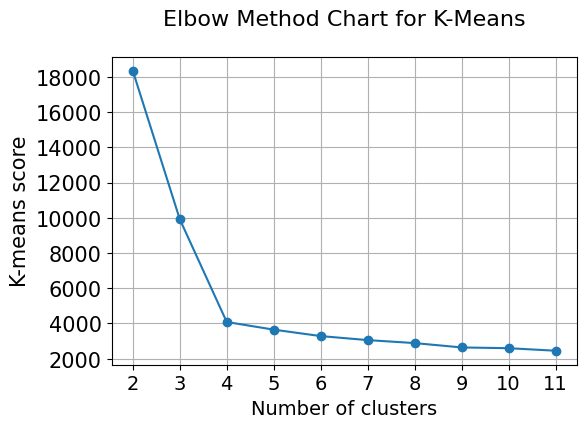

In [4]:
km = [KM(n_clusters = i, random_state = 99, n_init = 'auto').fit(df_raw1) for i in range(2, 12)]
km_inertias = [i.inertia_ for i in km]

plt.figure(figsize = (6, 4))
plt.title("Elbow Method Chart for K-Means\n",fontsize = 16)
plt.plot(range(2, 12), km_inertias, 'o-')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize = 14)
plt.ylabel("K-means score", fontsize = 15)
plt.xticks([i for i in range(2,12)], fontsize = 14)
plt.yticks(fontsize = 15)
plt.show()

It seems that k = 4 is the most effective 'K' for K-Means clustering for dataset 1

2. From dataset 1, create the scatterplot using subplots with the following layout, and give color based on the predicted cluster.

In [5]:
km = KM(n_clusters = 4, n_init = 'auto', random_state = 99).fit(df_raw1)
df_raw1['Cluster_Type'] = km.predict(df_raw1)
df1 = df_raw1.copy()

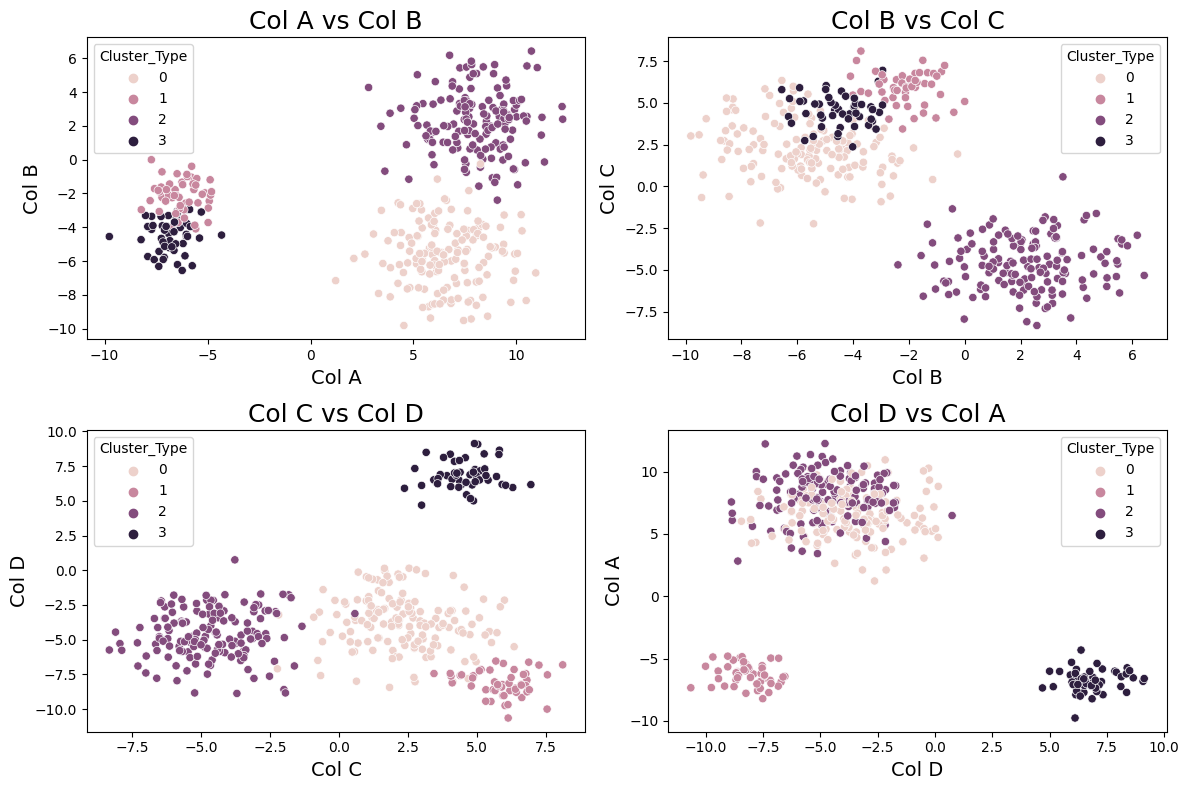

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
col = ["A", "B", "C", "D"]

for i in range(4):
  j = (i + 1) % 4
  sns.scatterplot(x = df1[col[i]],
                  y = df1[col[j]],
                  ax = ax[int(i/2), i%2],
                  hue = df1['Cluster_Type'])
  ax[int(i/2), i%2].set_title(f'Col {col[i]} vs Col {col[j]}', fontsize = 18)
  ax[int(i/2), i%2].set_xlabel(f'Col {col[i]}', fontsize = 14)
  ax[int(i/2), i%2].set_ylabel(f'Col {col[j]}', fontsize = 14)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

3. From dataset 2, create the scatterplot using subplots with the following layout, and give color based on 3 different model (5 clusters).

In [7]:
df_raw2 = pd.read_excel('dataset_lab5_1.xlsx')
display(df_raw2)
df_raw2.info()

,A,B
0,-4.726533,5.620291
1,-2.963245,-2.111318
2,-0.527506,-2.007363
3,-6.248401,4.744518
4,8.937070,8.235563
...,...,...
295,0.359432,-1.663801
296,7.744067,-2.922208
297,9.829252,-1.397585
298,6.268228,-4.374794


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       300 non-null    float64
 1   B       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [20]:
for x in range(19, 70):
  i = x/10
  for j in range(10, 70):
    dbs = DB(eps = i, min_samples = j).fit(df_raw2)
    labels = dbs.labels_
    if (len(set(labels)) - (1 if -1 in labels else 0)) == 5:
      print(f'True, i = {i}, j = {j}')
      break

True, i = 1.9, j = 21
True, i = 2.0, j = 24
True, i = 2.1, j = 29
True, i = 2.2, j = 32
True, i = 2.3, j = 34
True, i = 2.4, j = 35
True, i = 2.5, j = 39
True, i = 2.6, j = 46
True, i = 2.7, j = 49


In [21]:
km = KM(n_clusters = 5, n_init = 'auto', random_state = 99).fit(df_raw2)
gmm = GM(n_components = 5, random_state = 99).fit(df_raw2)
dbs = DB(eps = 2.7, min_samples = 49).fit(df_raw2)

col = ['K-Means', 'Gaussian Mixture', 'DBSCAN']
val = [km.predict(df_raw2), gmm.predict(df_raw2), dbs.labels_]

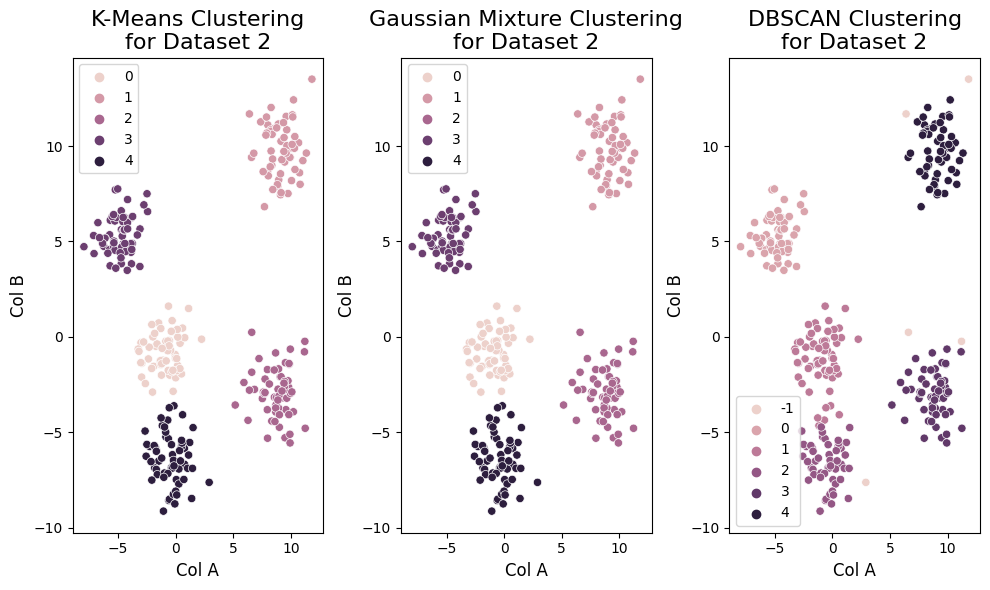

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (10, 6))
for i in range(3):
  sns.scatterplot(x = df_raw2['A'],
                  y = df_raw2['B'],
                  ax = ax[i],
                  hue = val[i])
  ax[i].set_title(f'{col[i]} Clustering\nfor Dataset 2', fontsize = 16)
  ax[i].set_xlabel('Col A', fontsize = 12)
  ax[i].set_ylabel(f'Col B', fontsize = 12)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [28]:
i = 0
for j in dbs.labels_:
  if j == -1:
    i=i+1

print(i*100/len(dbs.labels_))

1.6666666666666667
